<a href="https://colab.research.google.com/github/ram-ganesh-16/DataAugmentation/blob/master/Implementation_Lenet_Archi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import os
import numpy as np
#Mounting your GOOGLE DRIVE to Colab 
from google.colab import drive
drive.mount('/content/drive/')

print("Google Drive mounted successfully")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully


In [3]:
%pwd

'/content'

In [4]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [7]:
path12 = "/content/drive/My Drive/Colab Notebooks/NoteDetection/Data/100Aug"
path22 = "/content/drive/My Drive/Colab Notebooks/NoteDetection/Data/500Aug"

listing1 = os.listdir(path12)
listing2 = os.listdir(path22)


print("Path Established !")

Path Established !


In [8]:
%pwd 

'/content/drive/My Drive/Colab Notebooks'

In [9]:
#Loading the dataset into an array to give multiple samples at a time for training

Note_100 = np.array([np.array(Image.open(path12+'/'+lm)) for lm in listing1])
Note_500 = np.array([np.array(Image.open(path22+'/'+im)) for im in listing2])

DataSet = np.append(Note_100,Note_500,axis=0)
print(DataSet.shape)

(8100, 256, 256)


In [10]:
path12Test = "/content/drive/My Drive/Colab Notebooks/NoteDetection/test_100"
path22Test = "/content/drive/My Drive/Colab Notebooks/NoteDetection/test_500"

listing1Test = os.listdir(path12Test)
listing2Test = os.listdir(path22Test)

print("Path Established !")

Path Established !


In [11]:
Test_100 =np.array([(np.array(Image.open(path12Test+'/'+ls))) for ls in listing1Test ])
Test_500 = np.array([(np.array(Image.open(path22Test+'/'+ls))) for ls in listing2Test])

DatasetTest = np.append(Test_100,Test_500,axis=0)

print(DatasetTest.shape)

(1215, 256, 256)


In [12]:
print("Number of 100 samples : ", Note_100.shape[0])
print("Number of 500 samples : ", Note_500.shape[0])

Number of 100 samples :  3948
Number of 500 samples :  4152


In [13]:

print("Number of 100 samples : ", Test_100.shape[0])
print("Number of 500 samples : ", Test_500.shape[0])

Number of 100 samples :  517
Number of 500 samples :  698


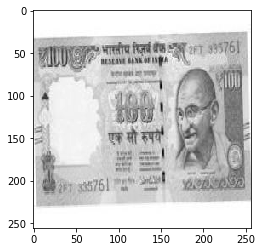

In [14]:
plt.imshow(DataSet[1513].reshape(256,256), cmap= 'gray')

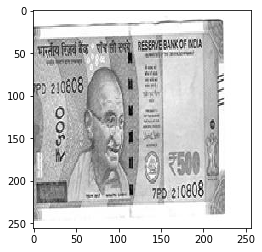

In [18]:
plt.imshow(DataSet[3948].reshape(256,256), cmap= 'gray')

In [23]:
Labels = np.ones([8100])  # create an array of the size of the training data

Labels[:Note_100.shape[0]] = 0  #Assign the label 0 to 100 INR
Labels[3948:8100] = 1   #Assign the label 1 to 500 INR

#Note: In case of more than 2 classes, one-hot encoding should be used. Check out what is one-hot encoding

LabelsTest = np.ones([1215])
LabelsTest[:Test_100.shape[0]] = 0
LabelsTest[Test_500.shape[0]:1215] = 1

print("Labeling done !")

Labeling done !


In [29]:
Labels[3947],Labels[8099]

(0.0, 1.0)

In [30]:
DataSet.shape,Labels.shape

((8100, 256, 256), (8100,))

In [0]:
from sklearn.utils import shuffle

# shuffling the records

DataSet,Labels = shuffle(DataSet,Labels,random_state=3)

(<matplotlib.image.AxesImage at 0x7f4b2edb8908>, 1.0)

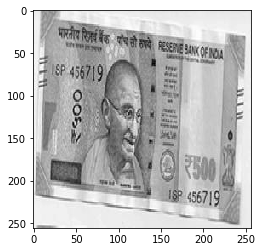

In [33]:
plt.imshow(DataSet[513].reshape(256,256), cmap= 'gray'),Labels[513]

(<matplotlib.image.AxesImage at 0x7f4b2ed94400>, 0.0)

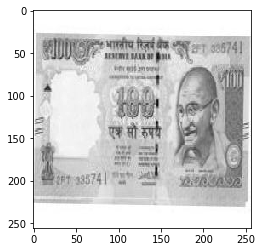

In [34]:
(plt.imshow(DataSet[1205].reshape(256,256), cmap='gray'),Labels[1205])

In [0]:
DataSet = DataSet.reshape(-1,256,256,1)

DatasetTest = DatasetTest.reshape(-1,256,256,1)

In [0]:
DataSet = DataSet.astype('float32')

DatasetTest = DatasetTest.astype('float32')

#normalizing by Division by 255
DataSet = DataSet/ 255.
DatasetTest =DatasetTest/255.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(DataSet,Labels,test_size=0.25,random_state=341)

print(X_train.shape, X_test.shape)

(6075, 256, 256, 1) (2025, 256, 256, 1)


(<matplotlib.image.AxesImage at 0x7f4b288f4588>, 0.0)

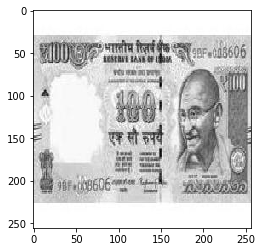

In [38]:
(plt.imshow(X_test[26].reshape(256,256), cmap='gray'), Y_test[26])

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D


#LeNET Architecture

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)))   # What is a convolution layer and what does filters mean?

model.add(AveragePooling2D())   # Checkout the need of pooling and various pooling techniques, when to use them?

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=60, activation='relu'))

model.add(Dense(units=1, activation = tf.nn.sigmoid))

In [0]:
learning_rate=0.001
BATCH_SIZE = 20
num_classes = 2

In [0]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 6)       60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 16)      880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7380600   
_________________________________________________________________
dense_5 (Dense)              (None, 60)                7260      
__________

In [44]:
# Use callbacks

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

#train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3, batch_size=BATCH_SIZE, callbacks=[callbacks])


Instructions for updating:
Use tf.cast instead.
Train on 6075 samples, validate on 2025 samples
Epoch 1/3
6075/6075 [==============================] - 279s 46ms/step - loss: 0.0877 - acc: 0.9686 - val_loss: 0.0096 - val_acc: 0.9985
Epoch 2/3
6075/6075 [==============================] - 277s 46ms/step - loss: 0.0615 - acc: 0.9891 - val_loss: 0.0103 - val_acc: 0.9970

Reached 98% accuracy so cancelling training!


In [45]:
DatasetTest,LabelsTest = shuffle(DatasetTest,LabelsTest,random_state=3)

y_pred=model.predict(DatasetTest, verbose=1)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded, dtype='float64')
print(y_pred1)

1215/1215 [==============================] - 22s 18ms/step
[0. 1. 1. ... 0. 1. 1.]


In [46]:
print(LabelsTest)

[0. 1. 1. ... 0. 1. 1.]


In [47]:
from sklearn.metrics import confusion_matrix, precision_score

confusion_matrix(LabelsTest, y_pred1)

array([[516,   1],
       [  0, 698]])

In [48]:
precision_score(LabelsTest, y_pred1)

0.9985693848354793

In [0]:
model.save("LeNet_Arch.h5")

In [50]:
!ls

 CNN_updated.ipynb		    NoteDetection
'Copy of LeNetArchitecture.ipynb'   NoteDetection.h5
 DataAugmentationCode.ipynb	    NoteDetection_Implementation
 Implementation_Lenet_Archi.ipynb   Untitled
 LeNet_Arch.h5			    Untitled0.ipynb
 LeNetArchitecture.ipynb
